In [1]:
#Ashref Bensaid
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# importing or loading the dataset
dataset = pd.read_csv('WHO-COVID-19-india-data_.csv', index_col='Date_reported', parse_dates=True)
dataset

,Unnamed: 0,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
Date_reported,,,,,,,,
2020-01-03,73344,IN,India,SEARO,0,0,0,0
2020-01-04,73345,IN,India,SEARO,0,0,0,0
2020-01-05,73346,IN,India,SEARO,0,0,0,0
2020-01-06,73347,IN,India,SEARO,0,0,0,0
2020-01-07,73348,IN,India,SEARO,0,0,0,0
...,...,...,...,...,...,...,...,...
2022-01-06,74078,IN,India,SEARO,90928,35109286,325,482876
2022-01-07,74079,IN,India,SEARO,117100,35226386,302,483178
2022-01-08,74080,IN,India,SEARO,141986,35368372,285,483463


In [3]:
dataset = dataset[['New_cases']]
dataset.columns = ['cases']
dataset


,cases
Date_reported,
2020-01-03,0
2020-01-04,0
2020-01-05,0
2020-01-06,0
2020-01-07,0
...,...
2022-01-06,90928
2022-01-07,117100
2022-01-08,141986


<AxesSubplot:xlabel='Date_reported'>

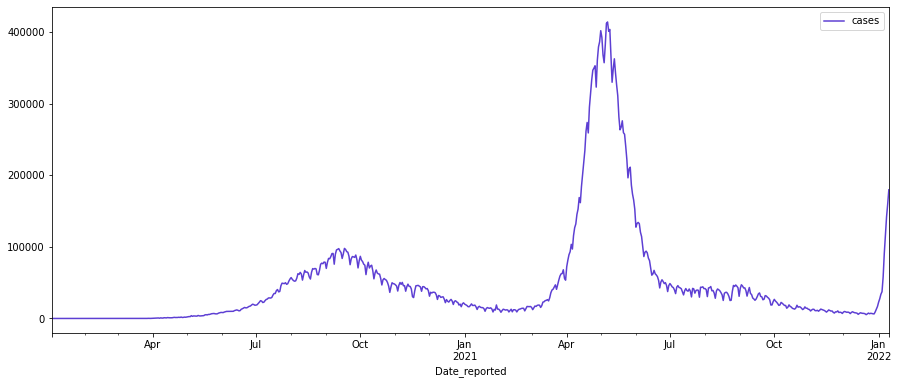

In [4]:
dataset.plot(color='#5D3FD3', figsize=(15,6))

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset)

In [6]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
length = 50
generator = TimeseriesGenerator(scaled_dataset, scaled_dataset, length=length, batch_size=1)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [8]:
model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(length, 1), return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(20, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(10, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 10)            480       
                                                                 
 dropout (Dropout)           (None, 50, 10)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 20)            2480      
                                                                 
 dropout_1 (Dropout)         (None, 50, 20)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10)                1240      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [9]:
from tensorflow.keras.models import load_model

In [10]:
#model.fit(generator,epochs=50)


In [11]:
#model.save('mfinal_external')
loaded_model = load_model('mfinal_external')

In [12]:
forecast = []
periods = 40
first_eval_batch = scaled_dataset[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))
for i in range(periods):
    current_pred = loaded_model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [13]:
forecast

[array([0.30540258], dtype=float32),
 array([0.36978617], dtype=float32),
 array([0.42002133], dtype=float32),
 array([0.4576709], dtype=float32),
 array([0.48508424], dtype=float32),
 array([0.50468135], dtype=float32),
 array([0.5185003], dtype=float32),
 array([0.5280082], dtype=float32),
 array([0.53412646], dtype=float32),
 array([0.5373544], dtype=float32),
 array([0.53799397], dtype=float32),
 array([0.5362092], dtype=float32),
 array([0.532101], dtype=float32),
 array([0.5257653], dtype=float32),
 array([0.51732504], dtype=float32),
 array([0.5069406], dtype=float32),
 array([0.49480784], dtype=float32),
 array([0.48114768], dtype=float32),
 array([0.46614227], dtype=float32),
 array([0.44976863], dtype=float32),
 array([0.43203688], dtype=float32),
 array([0.4131028], dtype=float32),
 array([0.39314902], dtype=float32),
 array([0.37234652], dtype=float32),
 array([0.350893], dtype=float32),
 array([0.32898796], dtype=float32),
 array([0.30681717], dtype=float32),
 array([0.286

In [14]:
forecast = scaler.inverse_transform(forecast)

In [15]:
forecast_index = pd.date_range(start='2022-01-11',periods=periods,freq='D')

In [16]:
forecast_df = pd.DataFrame(data=forecast,
                           index=forecast_index,
                           columns=['Forecast'])

forecast_df

,Forecast
2022-01-11,126491.998738
2022-01-12,153159.104825
2022-01-13,173966.052768
2022-01-14,189560.166601
2022-01-15,200914.524656
2022-01-16,209031.472541
2022-01-17,214755.169381
2022-01-18,218693.253719
2022-01-19,221227.372823
2022-01-20,222564.360306


<AxesSubplot:xlabel='Date_reported'>

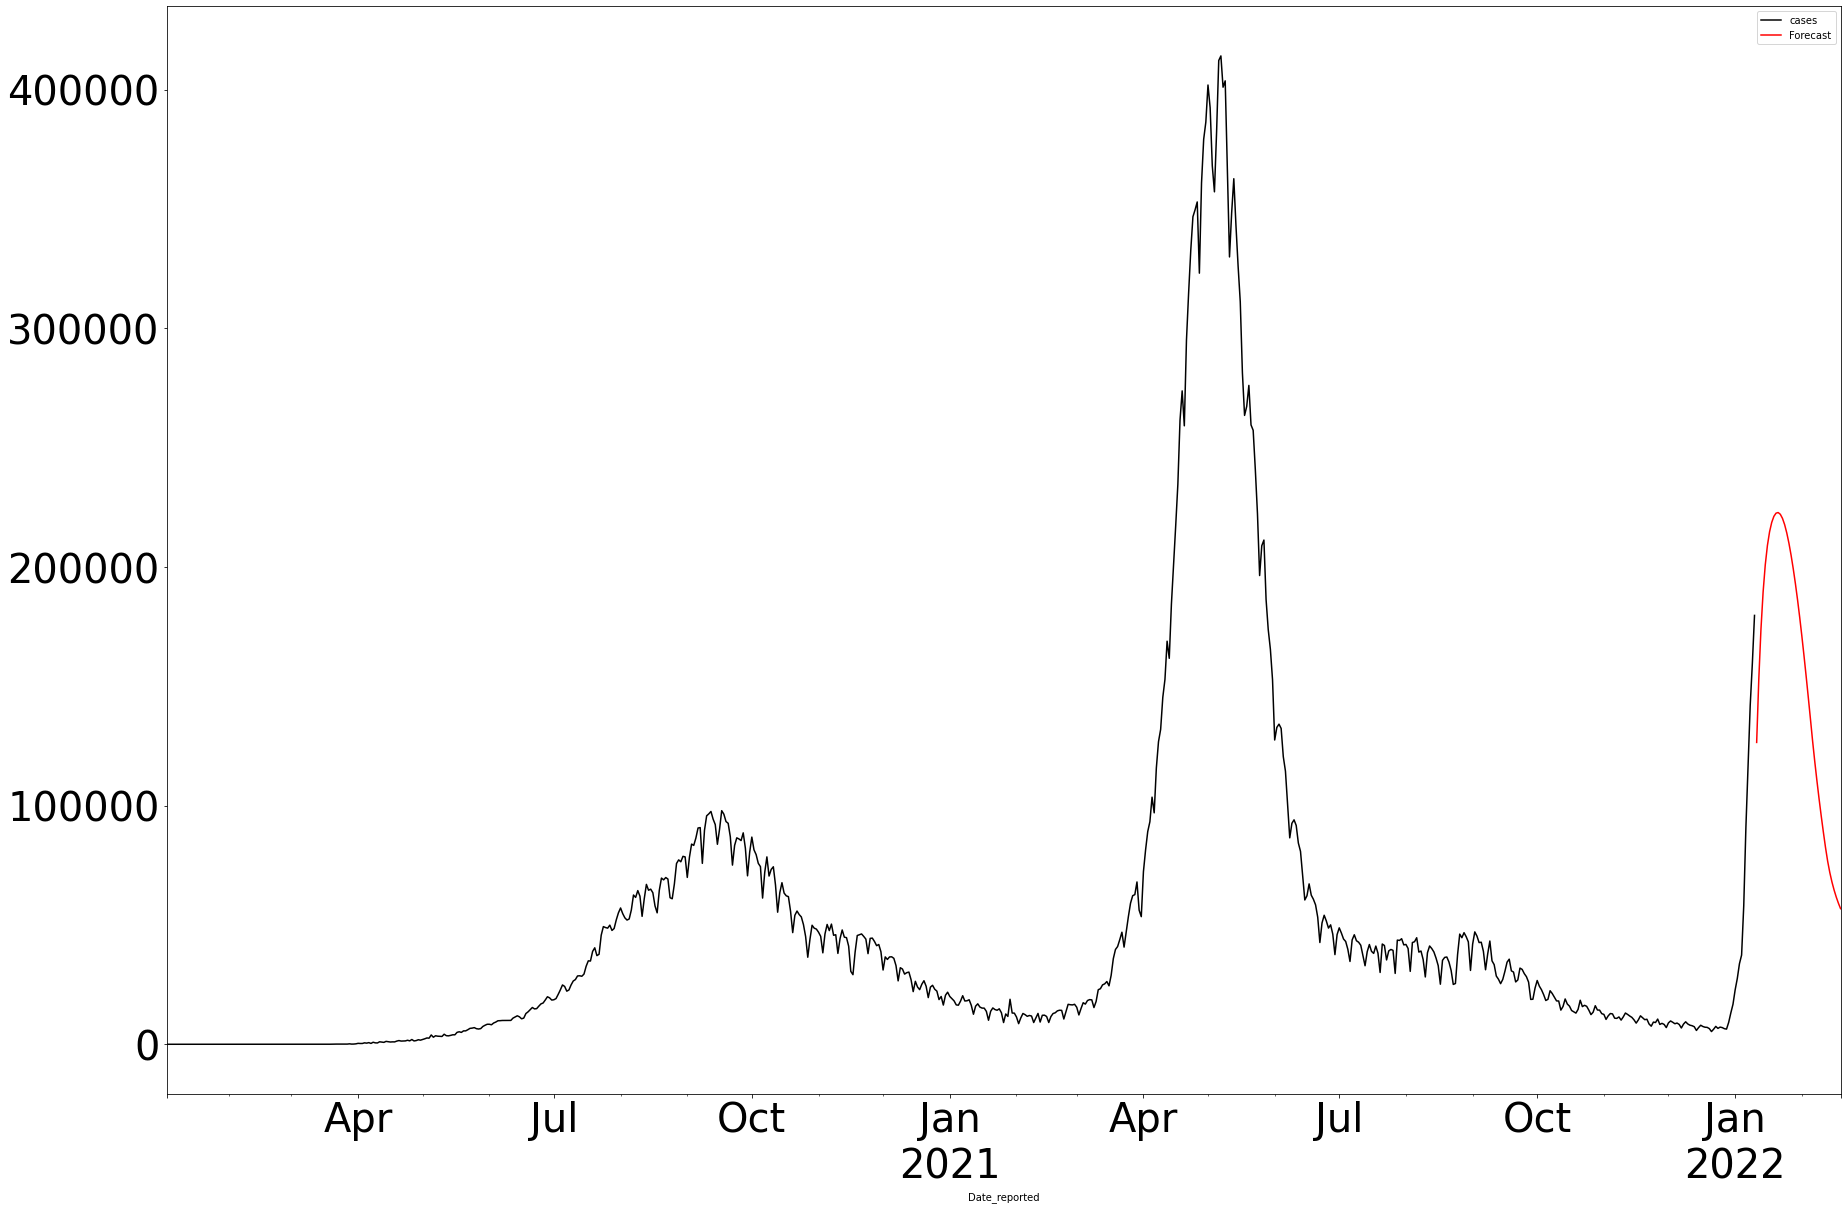

In [18]:
ax = dataset.plot(figsize=(30,20), color='black',fontsize=40)
forecast_df.plot(ax=ax, color='red')